# Project: Wrangling and Analyze Data

## Table of Content
<ul>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#quality">Quality issues</a></li>
<li><a href="#tidiness">Tidiness issues</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#analyzing">Analyzing and Visualizing Data</a></li>
<li><a href="#insights">Insights</a></li>
<li><a href="#reference">Reference</a></li>    
</ul>

<a id='gathering'></a>
## Data Gathering
In the cell below, I will gather **all** three pieces of data for this project and load them in the notebook. 

In [1]:
# Importing the neccessary lib
import pandas as pd
import numpy as np
import wptools
import os
import requests
import tweepy
import json
from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) and upload to the working file directory, then load data into a dataframe

In [2]:
#loading the twitter archive data into a dataframe
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Using the Requests library to programatically download the tweet image prediction (image_predictions.tsv)

In [3]:
# Downloading the image prediction file programmatically
# Make directory if it doesn't already exist
folder_name = 'new_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
#define url and use request.get method
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#saving html to file
with open("image_predictions.tsv.html", mode='wb') as file:
    file.write(response.content)

In [4]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
#loading the image prediction data to a dataframe
df1 = pd.read_csv('image_predictions.tsv', sep='\t')
df1.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. The Twitter Developer account was not approved, so I read the (tweet_json.txt) file programatically

In [6]:
#read tweet_json.txt file line by line into a pandas dataframe
records =[]
with open ('tweet_json.txt', 'r') as file:
#read in json line and convert to dict
    json_line = file.readline()

In [7]:
tweet = 'tweet.txt'
records = [json.loads(line) for line in open(tweet)]

In [8]:
# create DataFrame and read json file into the dataframe 
df2 = pd.DataFrame.from_dict(records)
df2.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


<a id='assessing'></a>
## Assessing Data
In this section, we will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. We will be assessing the data with **both** visual assessment and programmatic assessement.
The visual assessment was done with microsoft excel.

In [9]:
# viewing the dataframe
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [11]:
# we can visually ascertain that there are null values in the dataframe, however we will like to get the sum of nulls across the dataframe
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
#checking for duplicates
print(df.duplicated().sum())

0


In [13]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [14]:
#visualizing the second dataframe
df1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
#assessing the datatypes
df1.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [16]:
#checking for null values
df1.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [17]:
#assessing the third dataframe
df2

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,None,...,False,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,False,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,None,...,False,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,None,...,False,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,None,...,False,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835'

In [18]:
#checking for null values
df2.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [19]:
df2.dtypes

contributors                      object
coordinates                       object
created_at                        object
display_text_range                object
entities                          object
extended_entities                 object
favorite_count                     int64
favorited                           bool
full_text                         object
geo                               object
id                                 int64
id_str                            object
in_reply_to_screen_name           object
in_reply_to_status_id            float64
in_reply_to_status_id_str         object
in_reply_to_user_id              float64
in_reply_to_user_id_str           object
is_quote_status                     bool
lang                              object
place                             object
possibly_sensitive                object
possibly_sensitive_appealable     object
quoted_status                     object
quoted_status_id                 float64
quoted_status_id

In [20]:
# Checking for duplicates across the three tables 
all_columns = pd.Series(list(df) + list(df1) + list(df2))
all_columns[all_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
57                   source
dtype: object

<a id='quality'></a>
### Quality issues
df - twitter-archive-enhanced

1. There are extraneouns coloums (in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, ratings_numerators, rating_denominators).        

2. tweet id wrongly captured as integer instead of strings in the df table

3. The null values are captured as None in the name, floofer, pupper and puppo columns.

4. Names wrongly captured as "a", "an", "the", "quite", "none", "all", "by", "his", "just", "my", "not", "such", "the", "this", "very" in the name column.

5. The text column contains htttps links at the end of the text across all rows in the column

6. The source column contains http links

df1-image_predictions.tsv

7. p1,p2 and p3 columns have mixed case i.e some are sentence case while some are lowercase.

8. Tweet id is 2075 instead of 2356( we do not have access to the remaining data, so we cannot fix this problem)

9. tweet id wrongly captured as integer instead of strings in the df1 table

10. There is an extraneous column 'img_num'.

df2-Twitter Archive

12. Extraneouns coloumns      

13. tweet_id captured as id. 

14. id captured as integer and not strings

<a id='tidiness'></a>
### Tidiness issues
1. The doggo, floofer, pupper and puppo dog stages should be merged into one column in the df(twitter-archive-enhanced) dataframe

2. The three tables should be combined together to form one table.

<a id='cleaning'></a>
## Cleaning Data
In this section, clean **all** of the issues we documented while assessing. 

In [21]:
# Make copies of original pieces of data
df_clean = df.copy()
df1_clean = df1.copy()
df2_clean = df2.copy()

### Extraneous Columns

#### Define: 
- There are extraneouns coloums (in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, ratings_denominator, ratings_numerator) in the df table.
- There are extraneous columns in the df2 table such as ('contributors','coordinates','created_at','display_text_range','entities','extended_entities','favorited','full_text','geo','id_str','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','is_quote_status','lang','place','possibly_sensitive','possibly_sensitive_appealable','quoted_status','quoted_status_id','quoted_status_id_str','retweeted','retweeted_status','source','truncated','user').
- The df1 table has an extraneous column 'img_num'.
- We will be droping these columns.

#### Code

In [22]:
#dropping retweet rows before droping the columns
df_clean[df_clean.retweeted_status_id.isnull()]
df_clean[df_clean.retweeted_status_user_id.isnull()]
df_clean[df_clean.retweeted_status_timestamp.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [23]:
#Droping the extraneouns coloums (in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'timestamp', 
              'retweeted_status_id', 'retweeted_status_user_id','rating_numerator',
              'rating_denominator','retweeted_status_timestamp', 'expanded_urls'  ], axis=1, inplace=True)

#### Test

In [24]:
# testing the code here
df_clean.head(15)

,tweet_id,source,text,name,doggo,floofer,pupper,puppo
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,None,None,None,None
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,None,None,None,None
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,None,None,None,None
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,None,None,None,None
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,None,None,None,None
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,None,None,None,None,None
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,Jax,None,None,None,None
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,None,None,None,None,None
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,Zoey,None,None,None,None
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,Cassie,doggo,None,None,None


#### Code

In [25]:
#Droping the extraneouns coloums in the df2 table
df2_clean.drop(['contributors', 'coordinates', 'created_at','display_text_range','entities','extended_entities','favorited',
                'full_text','geo','id_str','in_reply_to_screen_name','in_reply_to_status_id','in_reply_to_status_id_str',
                'in_reply_to_user_id','in_reply_to_user_id_str','is_quote_status','lang','place','possibly_sensitive',
                'possibly_sensitive_appealable','quoted_status','quoted_status_id','quoted_status_id_str','retweeted',
                'retweeted_status','source','truncated','user'], axis=1, inplace=True)

#### Test

In [26]:
#testing the code here
df2_clean.head(2)

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514


#### Code

In [27]:
# droping the extraneous column img_num' from the df1 table
df1_clean.drop(['img_num'], axis=1, inplace= True)

#### Test

In [28]:
#testing the code here
df1_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Renaming column headers

#### Define
- The tweet id column in the df2 table has been wrongly captured as id, we will be renaming the column header of this column to tweet_id.


#### Code

In [29]:
#renaming the id column to tweet_id for uniformity
df2_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [30]:
# testing the code here
df2_clean.head(2)

,favorite_count,tweet_id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514


In [31]:
#testing the code here
df2_clean.dtypes

favorite_count    int64
tweet_id          int64
retweet_count     int64
dtype: object

## Tweet id wrongly captured as integer instead of strings in the df, df1 and df2 tables

#### Define
- The tweet id wrongly captured as integer instead of strings in the df,df1 and df2 tables, we will need to fix the datatype

#### Code

In [32]:
#converting tweet id to strings
df_clean["tweet_id"]= df_clean["tweet_id"].astype(str)
df1_clean["tweet_id"]= df1_clean["tweet_id"].astype(str)
df2_clean["tweet_id"]= df2_clean["tweet_id"].astype(str)

#### Test

In [33]:
df_clean.dtypes

tweet_id    object
source      object
text        object
name        object
doggo       object
floofer     object
pupper      object
puppo       object
dtype: object

In [34]:
df1_clean.dtypes

tweet_id     object
jpg_url      object
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [35]:
df2_clean.dtypes

favorite_count     int64
tweet_id          object
retweet_count      int64
dtype: object

### Names wrongly captured as "a", "an", "the", "quite", "none", "all", "by", "his", "just", "my", "not", "such", "the", "this", "very" in the name column.

#### Define 
- Names wrongly captured as "a", "an", "the", "quite", "none", "all", "by", "his", "just", "my", "not", "such", "the", "this", "very" in the name column. we will replace this names with NaN to represent that the names where not captured correctely.

#### Code

In [36]:
#assigning a variable to all wrong names
wrongnames = (["a", "an", "the", "quite", "None", "all", "by", "his", "just", "my", "not", "such", "the", "this", "very"])
#using the for loop to replace all the wrong names with no name in the name column
for x in wrongnames:
    df_clean["name"].replace(x, np.nan, inplace = True)

#### Test

In [37]:
#testing the code 
df_clean.name.value_counts().head(10)

Charlie    12
Lucy       11
Cooper     11
Oliver     11
Penny      10
Tucker     10
Lola       10
Bo          9
Winston     9
Sadie       8
Name: name, dtype: int64

## The null values are captured as None in the name, floofer, pupper and puppo columns.

#### Define
- The null values in the name, floofer, pupper and puppo columns are represented as a string called None. We will be replacing this strings with NaN for uniformity

In [38]:
# replacing 'None' with 'NaN'
df_clean = df_clean.replace('None', np.nan, regex=True)

#### Test

In [39]:
#testing the code here
df_clean

,tweet_id,source,text,name,doggo,floofer,pupper,puppo
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,NaN,NaN,NaN,NaN
5,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,NaN,NaN
6,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,Jax,NaN,NaN,NaN,NaN
7,890729181411237888,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,NaN,NaN
8,890609185150312448,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,Zoey,NaN,NaN,NaN,NaN
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,Cassie,doggo,NaN,NaN,NaN


### The p1,p2 and p3 columns have mixed case i.e some are sentence case while some are lowercase.

#### Define
- The p1,p2 and p3 columns have mixed case i.e some are sentence case while some are lowercase. we will be making the values a lowercase for uniformity.

#### Code

In [40]:
# Your cleaning code here
df1_clean['p1'] = df1_clean['p1'].str.lower()
df1_clean['p2'] = df1_clean['p2'].str.lower()
df1_clean['p3'] = df1_clean['p3'].str.lower()

#### Test

In [41]:
#testing the code here 
df1_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### The text column contains htttps links at the end of the text across all rows in the column

#### Define
- The text column contains htttps links at the end of the text across all rows in the column, this links will be striped from the text

#### Code

In [42]:
#stripping the link from the text
df_clean['text'] = df_clean.text.str.replace(r"http\S+", "")
df_clean['text'] = df_clean.text.str.strip()


#### Test

In [43]:
# testing the code
df_clean.query("text == 'http'")

,tweet_id,source,text,name,doggo,floofer,pupper,puppo


### The text in the source column in the df table contains http link  

#### Define
- The text in the source column in the df table contains http link, we will use the replace function to replace this links with the source string

#### Code

In [44]:
# using the replace function to replace the link with the text across the dataframe
to_replace = {
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone' ,
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine - Make a Scene',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'
}
# Iterate over all key-value pairs in dictionary 
for key, value in to_replace.items():
    # Replace key character with value character in string
    df_clean = df_clean.replace(key, value)

#### Test

In [45]:
#testing the code
df_clean.head()

,tweet_id,source,text,name,doggo,floofer,pupper,puppo
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,NaN,NaN,NaN,NaN


### Tidiness

#### Define
- The doggo, floof, pupper and puppo dog stages in the df(twitter-archive-enhanced)dataframe should be merged into one column using the melt function.

#### Code

In [46]:
#Using the melt funtion to unpivot the columns and merge into one column
df_clean = pd.melt(df_clean, id_vars=['tweet_id', 'source', 'text', 'name'],
                            var_name= 'stages',value_name='dog_stages')
df_clean.head(10)

,tweet_id,source,text,name,stages,dog_stages
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,doggo,NaN
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,doggo,NaN
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,doggo,NaN
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,doggo,NaN
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,doggo,NaN
5,891087950875897856,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,doggo,NaN
6,890971913173991426,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,Jax,doggo,NaN
7,890729181411237888,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,doggo,NaN
8,890609185150312448,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,Zoey,doggo,NaN
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,Cassie,doggo,doggo


#### Test

In [47]:
#testing the code
df_clean.head()

,tweet_id,source,text,name,stages,dog_stages
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,doggo,NaN
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,doggo,NaN
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,doggo,NaN
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,doggo,NaN
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,doggo,NaN


### The three tables should be combined together to form one table.The three tables hould be merged to one table 


#### Define
- The three tables should be combined together to form one table for the ananlysis.

#### Code

In [48]:
# Your cleaning code here
df_master = pd.merge(pd.merge(df_clean,df1_clean,on='tweet_id'),df2_clean,on='tweet_id')

#### Test

In [49]:
# testing the code here
df_master.head()

,tweet_id,source,text,name,stages,dog_stages,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,doggo,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,floofer,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
2,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,pupper,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
3,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,puppo,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
4,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,doggo,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,33819,6514


In [50]:
#testing for duplicate columns across the 3 dataframe
all_columns = pd.Series(list(df_clean) + list(df1_clean) + list(df2_clean))
all_columns[all_columns.duplicated()]

6     tweet_id
18    tweet_id
dtype: object

## Research Questions
- What is the correlation(relationship) between favourite count and retweet count.
- What dog stage is the most like stage.
- What tweet source has the highest user.

## Assessing the merged dataframe

In [51]:
df_master.head()

,tweet_id,source,text,name,stages,dog_stages,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,doggo,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,floofer,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
2,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,pupper,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
3,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,puppo,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
4,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,doggo,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,33819,6514


In [52]:
df_master.isnull().sum()

tweet_id             0
source               0
text                 8
name              2656
stages               0
dog_stages        7959
jpg_url              0
p1                   0
p1_conf              0
p1_dog               0
p2                   0
p2_conf              0
p2_dog               0
p3                   0
p3_conf              0
p3_dog               0
favorite_count       0
retweet_count        0
dtype: int64

In [53]:
df_master.shape

(8292, 18)

### Assessment report
- The dataframe contains 8,292 rows and 17 columns.
- There are extraneous columns which we do not need for these analysis and hence we will be droping these columns.
- There are duplicates in the dataframe, we will be droping these duplicates 
- There are null values in the dataframe. we will be droping these null values

## Data Cleaning
- In this section we will be cleaning the merged dataframe in preparation of the analysis.

In [54]:
#dropping extraneous columns from the dataframe
df_master.drop([ 'p1', 'p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','stages' ], axis=1, inplace= True)

In [55]:
#testing the cleaning
df_master.head()

,tweet_id,source,text,name,dog_stages,jpg_url,favorite_count,retweet_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,39467,8853
1,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,39467,8853
2,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,39467,8853
3,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,39467,8853
4,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,33819,6514


In [56]:
#droping duplicates from the dataframe
df_master.drop_duplicates(inplace = True)

In [57]:
#testing the cleaning
print(df_master.duplicated().sum())

0


In [58]:
df_master.head()

,tweet_id,source,text,name,dog_stages,jpg_url,favorite_count,retweet_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,39467,8853
4,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,33819,6514
8,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,25461,4328
12,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,42908,8964
16,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,41048,9774


In [59]:
df_master.shape

(2406, 8)

In [60]:
df_master.isnull().sum()

tweet_id             0
source               0
text                 2
name               807
dog_stages        2073
jpg_url              0
favorite_count       0
retweet_count        0
dtype: int64

In [61]:
# dropping the null values
df_master = df_master.dropna()

In [62]:
df_master.isnull().sum()

tweet_id          0
source            0
text              0
name              0
dog_stages        0
jpg_url           0
favorite_count    0
retweet_count     0
dtype: int64

In [63]:
df_master.shape

(190, 8)

<a id='storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
df_master.to_csv('twitter_archive_master.csv', index=False)

<a id='analyzing'></a>
## Analyzing and Visualizing Data
We have trimmed and cleaned the data. In this section, we will analyze and visualize the wrangled data. 
- We produce at least **three (3) insights and one (1) visualization** from the research questions posed.

### What is the correlation(relationship) between favourite count and retweet count.

In [65]:
#assigning a function
def label(x,y,z):
    plt.title(x)
    plt.xlabel(y)
    plt.ylabel(z)
    plt.show()

In [66]:
# correlation between favorite_count and retweet_count 
print(df_master['retweet_count'].corr(df_master['favorite_count']))

0.709702963897


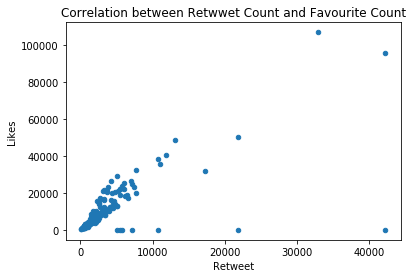

In [67]:
# vizualization the correlation
df_master.plot(x='retweet_count', y= 'favorite_count', kind = 'scatter');
label('Correlation between Retwwet Count and Favourite Count', "Retweet", "Likes")

- From the plot and analysis above we can see that there is a positive correlation with a correlation coefficient of 0.7 between favorite and retweet count.

### What dog stage is the most like stage.

In [ ]:
#finding the count value for each variable by dog stage
dog_stage = df_master.groupby('dog_stages').sum()['favorite_count']
dog_stage

In [ ]:
#Visualizing dog stages
dog_stage.plot(kind = 'bar');
label('Frequncy of most liked Dog Stage', "Stages", "Frequency")

- From the analysis and plot above we can deduce that the dogs with the most likes are dogs in the pupper stage. This implies that they are the most like stage of the dog cycle.

###  What tweet source has the highest user.

In [ ]:
source = df_master.groupby('source').source.count()
source

In [ ]:
#Plotting the chart of sources
source.plot(kind='bar')
label('Distribtion of tweet by source', "source", "Frequency")

- From the plot and analysis above we can infer that most followers of the weratedog page are iphone users.

<a id='insights'></a>
### Insights:
1. There is a positive correlation between favorite count and retweet count. This shows that the higher the retweet the higher the likes. 

2. Dogs in the pupper stages have the most likes, hence they are the favourite stage of dogs.

3. The highest source of users tweets is from iphones.

<a id='reference'></a>
### Reference
- Stackoverflow, https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
- Borislav Hadzhiev, Jul 11, 2022, https://bobbyhadz.com/blog/python-remove-url-from-texts
- Studytonight.com,  https://www.studytonight.com/python-howtos/how-to-replace-multiple-substrings-of-a-string-in-python
- Geeksforgeeks, https://www.geeksforgeeks.org/how-to-calculate-correlation-between-two-columns-in-pandas/